# Import Frameworks

In [12]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt    
import seaborn as sns;sns.set()

In [2]:
from  warnings import filterwarnings
filterwarnings("ignore")

# Descriptive Stats:

## Population
Collection of all items of interest **N parameters**.
Populations are hard to define and hard to observe in real life.<br>
You will almost always be working with sample data.<br>
**Note**:this data here down its not a population but we will pretend its population.

In [3]:
# Example of Population
population = pd.read_csv(r"C:\Users\User\Desktop\Data World\data\Fields\Regression\Restaurant Revenue\restaurant_data.csv")
population.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [4]:
# This population has 8368 intances with 17 features each.
population.shape

(8368, 17)

## Sample
A subset of the population **n statistics**.<br>
We use samples cause they are :<br>
<ul>-less time consuming.<br>
-less costly (cheaper).

Somestimes there are **different formulas** for population and sample<br>
cause **population params** 100% sure if the measures you are calculating<br> 
but **sample statistics** are **approximation** of the population parameter.<br>
for example if you take 10 differemt samples you end with 10 different measures.

In [5]:
# Totally Random Selection
n_samples = 40
sample = population.sample(n=n_samples)

## Types of Data
We classify data in two main ways:
<ul><pre>-Qualitative:Categorical
<ul><pre>-Nominal:Data with no inhetent order.
<pre>-Ordinal:Data with an order but no consistent difference between values </ul>
<pre>-Quantitative:Numerical
<ul><pre>-Interval: Data without a true zero.
<pre>-Ratio:Data with a true zero.</ul>

## Measurment Levels
<pre>-Nominal:
<ul><pre>-Example: Hair Color,Nationality.
<pre>-Descriptive Stats: Frequency,Mode.</ul>
<pre>-Ordinal:
<ul><pre>-Example: Movie Ratings(poor,fair,good),Food Quality(dishusting-neutral-dilicious).
<pre>-Descriptive Stats: Median,Mode,Percentiles.</ul>
<pre>-Interval:
<ul><pre>-Example:Temprature(in Celsius or Fahrenheit).
<pre>-Descriptive Stats: All Measures.
<pre>-Note:Differences between values make sense,but ratios do not.
</ul>
<pre>-Ratio:
<ul><pre>-Example: Income,Distance.
<pre>-Descriptive Stats: All Measures.
<pre>-Note:Both Differences and ratios are meaningful.
</ul>

### Importance:
<h5>Appropriate Analysis:</h5>Ensures the correct statistical methods are used.For instance,calculating the mean of nominal data is meaningless.
<h5>Interpretability:</h5>Dictates how we can interpret the data.
For instance,for ordinal data we know the rank but not the exact difference between ranks.
<h5>Summarization:</h5> Different data types require different summarization techniques.Nominal and Ordinal data are often summarized with frequecies and proportions,while Interval and Ratio dara are often summarized with measures of central tendency and dispersion.<br>
In sum,it guids the selection of statistical tools and ensures accurate and meaningful interpretation of descriptive stats.

## Representation of Categorical Variables:

## One Variable
<ul><pre>-Frequency distribution tables.
<pre>-Pie charts.
<pre>-Bar charts.
<pre>-Pareto diagrams: is a special type of bar chart,where categrories are shown in descending order of frequency.

**Frequency** is the number of occurrences of each item.

In [6]:
# Frequency Table
frequency_table = pd.DataFrame(sample['Location'].value_counts())
frequency_table.columns = ['Frequency']
frequency_table.loc['Total','Frequency'] = frequency_table['Frequency'].sum()
frequency_table

,Frequency
Location,
Downtown,15.0
Suburban,15.0
Rural,10.0
Total,40.0


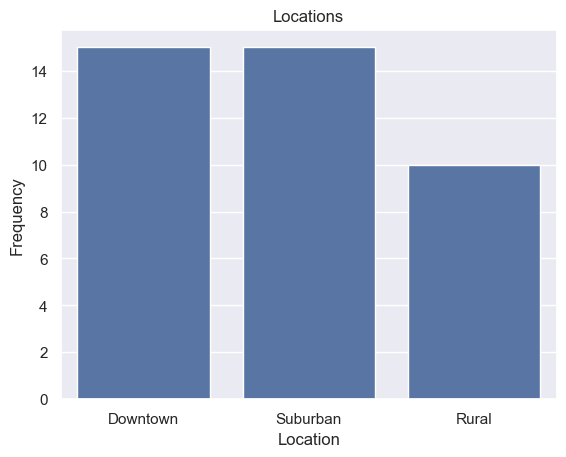

In [13]:
# Bar chart
frequencies = frequency_table.iloc[:-1,0]
sns.barplot(x=frequencies.index,y=frequencies.values)
plt.ylabel('Frequency')
plt.title('Locations')
plt.show()

**Relative Frequency** is the percentage of the total frequency for each category.

In [16]:
frequency_table['Relative Frequency'] = frequency_table['Frequency'] / frequency_table.loc['Total','Frequency']*100
frequency_table

,Frequency,Relative Frequency
Location,,
Downtown,15.0,37.5
Suburban,15.0,37.5
Rural,10.0,25.0
Total,40.0,100.0


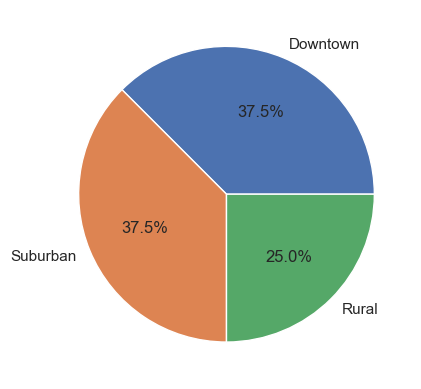

In [17]:
# Pie chart
rel_frequencies = frequency_table.iloc[:-1,1]
plt.pie(rel_frequencies,labels=rel_frequencies.index,autopct='%1.1f%%')
plt.show()

**Cumulative Frequency** is the running total of frequencies as you progress through the data set. It represents the total number of observations up to a certain value.

In [18]:
frequency_table['Cumulative Frequency'] = frequency_table.iloc[:-1,1].cumsum()
frequency_table

,Frequency,Relative Frequency,Cumulative Frequency
Location,,,
Downtown,15.0,37.5,37.5
Suburban,15.0,37.5,75.0
Rural,10.0,25.0,100.0
Total,40.0,100.0,NaN


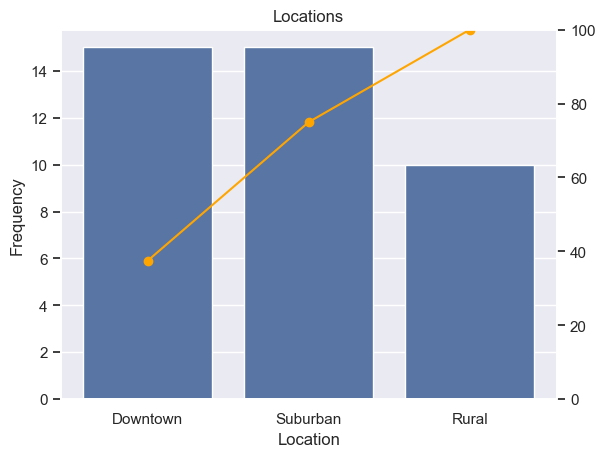

In [20]:
cum_frequencies = frequency_table.iloc[:-1,2]
sorted_frequencies = frequencies.sort_values(ascending=False)

# Plot Bars
fig,ax1 = plt.subplots()
sns.barplot(x=sorted_frequencies.index,y=sorted_frequencies.values,ax=ax1)
ax1.set_ylabel('Frequency')
ax1.set_title('Locations')

# Plot Cumulative Frequencies
ax2 = ax1.twinx()
ax2.plot(cum_frequencies.values,color='orange',marker='o')
ax2.set_ylim((0,100))
ax2.grid(False)
plt.show()

**The Pareto diagram** combines the strong sides of the bar and pie charts.

## Two Variables
<ul><pre>-Cross Tables.
<pre>-Side-by-Side chart(Grouped Bars).

In [21]:
# Cross Table
cuisineXlocation = pd.crosstab(sample['Cuisine'],sample['Location'],margins=True,margins_name='Total')
cuisineXlocation

Location,Downtown,Rural,Suburban,Total
Cuisine,,,,
American,3,3,2,8
French,6,0,2,8
Indian,1,4,4,9
Italian,1,2,1,4
Japanese,1,1,3,5
Mexican,3,0,3,6
Total,15,10,15,40


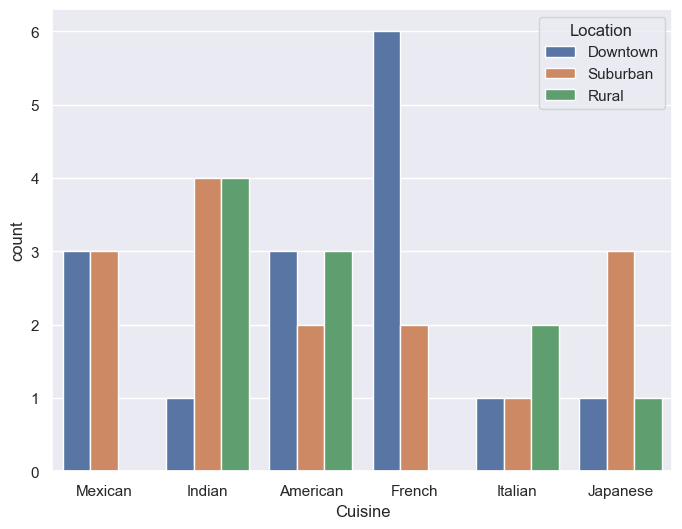

In [22]:
# Side by Side Chart(Grouped Bars)
plt.figure(figsize=(8, 6))
sns.countplot(data=sample, x='Cuisine', hue='Location')
plt.show()


## Representation of Numerical Variables:

## One Variable
<ul><pre>-Frequency Table
-Histogram

In [25]:
# Frequency Disribution Table
# Suppose We have this frequencies all ones 
chiefs_experience = pd.DataFrame(sample['Chef Experience Years'].value_counts())
chiefs_experience.columns = ['Frequency']
chiefs_experience['Frequency'] = 1
chiefs_experience

,Frequency
Chef Experience Years,
10,1
1,1
17,1
12,1
14,1
13,1
16,1
3,1
4,1


It makes much more sense to group the (numerical) data to intervals.<br>
Generally,statisticians perfer 5 to 20 intervals,but i depends.

In [23]:
def frequency_distribution_table(table,desired_intervals):
    max = table.index.max()
    min = table.index.min()
    interval_width = round((max - min)/desired_intervals) # (largest number - smallest number) / number of desired intervals 
    interval_start = [i for i in range(min,max,interval_width)]
    interval_end = interval_start[1:] + [max]
    frequencies = [1]+[0]*(desired_intervals-1)
    for val in table.index.values:
        for i in range(desired_intervals):
            start = interval_start[i]
            end = interval_end[i]
            if end >= val > start:
                frequencies[i] += table.loc[val,'Frequency']
    df = pd.DataFrame({'Interval start':interval_start,'Interval end':interval_end,'Frequency':frequencies})
    return df

In [26]:
# We will choose 5 intervals
desired_intervals = 5
frequency_dist = frequency_distribution_table(chiefs_experience,desired_intervals)
frequency_dist

,Interval start,Interval end,Frequency
0,1,5,5
1,5,9,4
2,9,13,4
3,13,17,4
4,17,19,2


**The relative frequency** is the frequency of a given interval as part of the total.

In [27]:
frequency_dist['Relative Frequency'] = round(frequency_dist['Frequency'] / frequency_dist['Frequency'].sum()*100,2)
frequency_dist

,Interval start,Interval end,Frequency,Relative Frequency
0,1,5,5,26.32
1,5,9,4,21.05
2,9,13,4,21.05
3,13,17,4,21.05
4,17,19,2,10.53


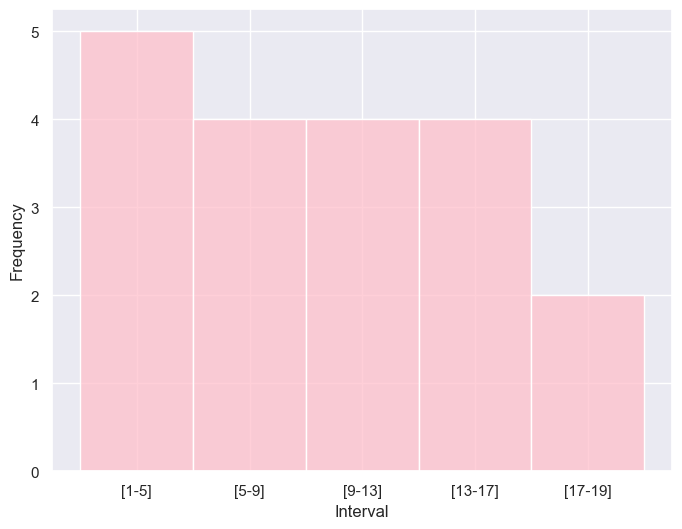

In [32]:
# Plot Histogram
intervals = []
for start, end, freq in zip(frequency_dist['Interval start'],frequency_dist['Interval end'], frequency_dist['Frequency']):
    intervals.extend([f'[{start}-{end}]'] * int(freq))
# Plot Histogram
plt.figure(figsize=(8, 6))
sns.histplot(intervals,color='pink')

plt.xlabel('Interval')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

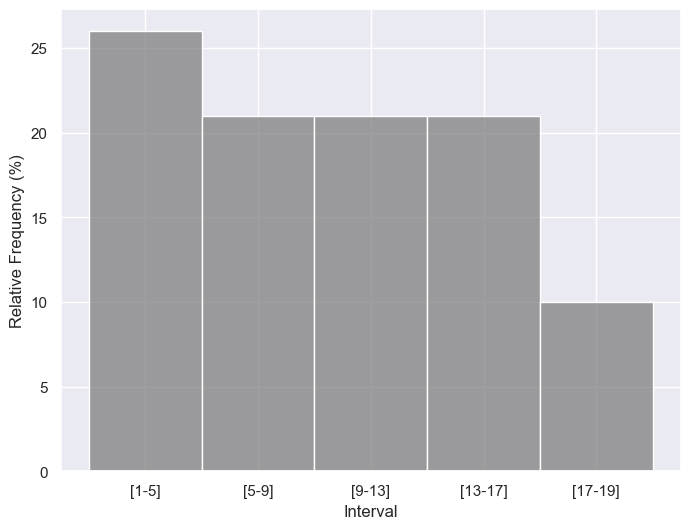

In [30]:
# Plot Histogram relative frequency
intervals = []
for start, end, rel_freq in zip(frequency_dist['Interval start'],frequency_dist['Interval end'], frequency_dist['Relative Frequency']):
    intervals.extend([f'[{start}-{end}]'] * int(rel_freq))

plt.figure(figsize=(8, 6))
sns.histplot(intervals,color='gray')

plt.xlabel('Interval')
plt.ylabel('Relative Frequency (%)')
plt.grid(True)
plt.show()

## Two Variables

<ul><pre>-Scatter plot.

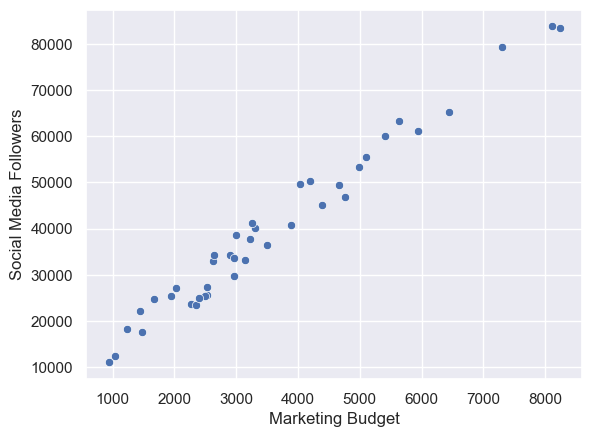

In [21]:
sns.scatterplot(data=sample,x='Marketing Budget',y='Social Media Followers')
plt.show()

Each point gives  us information about a particular instance.<br>
**Scatter plots** represent lots and lots of observations.<br>
**Outliers** are data points that go against the logic of the whole dataset.

## Measures of Central Tendency
<ul><pre>-mean
-median
-mode

### Mean(average):
by adding up all the components and then dividing by the number of components.<br><br>
**Symbol**:<br>
<ul><pre>population:u<br>
sample:x-(x bar)

In [33]:
# Mean of Ratings
sample['Rating'].mean()

4.1075

**The mean** is not enough to make definite conclusions cause its affected by outliers.

### Median:
is the **middle** number(at position:(n+1)/2) in an ordered dataset.<br>
if n is even it means there is no single value in the middle so we take the mean of the two centered values.

In [34]:
# Median of Ratings
sample['Rating'].median()

4.1

**The median** is not affected by outliers.

### Mode:
is the value that **occurs most often**.<br>
if there more than one top occurs val,we can say there is **No mode**... or like 3 modes.

In [36]:
# Mode of Ratings
sample['Rating'].mode().values.item(0)

3.4

### Which measure is best?
There is no best,but using only one is definitly the **worst!**

## Measures of Asymmetry
<ul><pre>-Skewness

### Skewness
measures the **asymmetry** of a disribution around its mean.<br>
if a disribution is perfectly symmetrical,its skewness is zero.

##### Positive Skewness
-Thr right tail is longer of fatter than the left.<br>
-The data is **skewred to right**.<br>
-mean > median.<br>
-Outliers are more in the **right side**.

In [37]:
# Positive Skewness
marketing_budget = sample['Marketing Budget']
marketing_budget.skew()

1.526187050766045

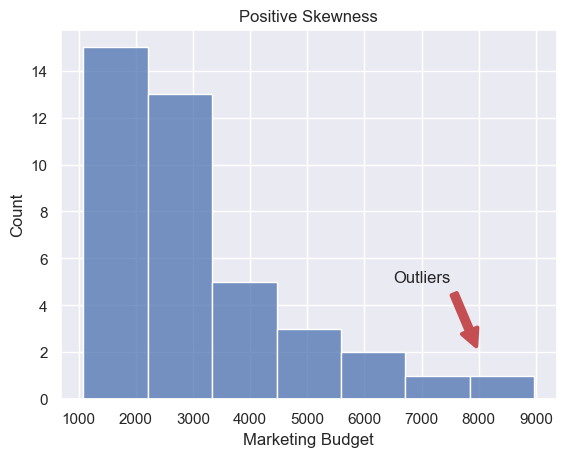

In [47]:
sns.histplot(marketing_budget)
plt.annotate('Outliers',xy=(8000,2),xytext=(6500,5),arrowprops=dict(color='r',shrink=0.09,lw=3))
plt.title('Positive Skewness')
plt.show()

In [39]:
# Mean is Larger than Median
print(f'Mean={marketing_budget.mean()} > Median={marketing_budget.median()}')

Mean=3109.025 > Median=2543.0


### Zero Skewness
-The data is **not skewred**.<br>
-mean = median = mode.<br>

In [40]:
# Zero Skewness
rating = sample['Rating']
rating.skew()

0.06853048726601842

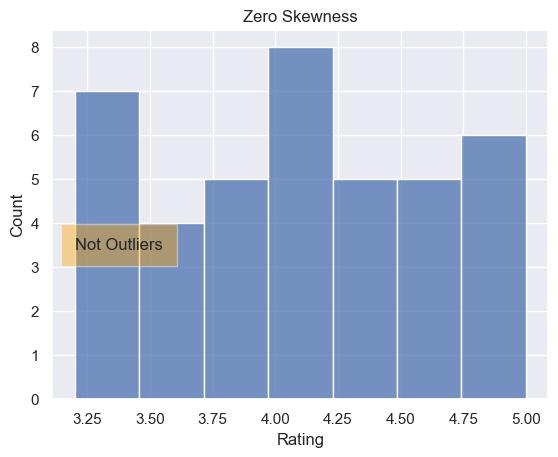

In [44]:
sns.histplot(rating)
plt.text(3.2,rating.mode().values.item(0),'Not Outliers',bbox={'facecolor':'orange','alpha':0.4,'pad':10})
plt.title('Zero Skewness')
plt.show()

In [45]:
# Mean, Median and Mode are all Equal
print(f'Mean={rating.mean():.1f} = Median={rating.median()} = Mode={rating.mode().values.item(0)}')

Mean=4.1 = Median=4.1 = Mode=3.4


### Negative Skewness
-The left tail is longer or fatter than the left.<br>
-The data is **skewred to left**.<br>
-Outliers are in the **left side**.

In [49]:
# Negative Skewness
social_media_followers_neg = sample['Social Media Followers']*-1
social_media_followers_neg.skew()

-1.399967202225278

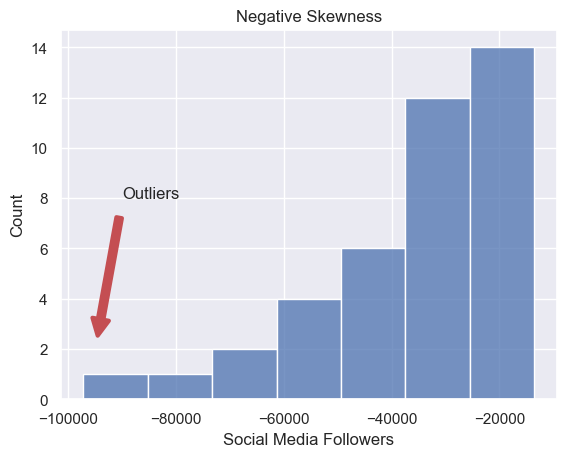

In [51]:
sns.histplot(social_media_followers_neg)
plt.annotate('Outliers',xy=(-95_000,2),xytext=(-90_000,8),arrowprops=dict(color='r',shrink=0.09,lw=3))
plt.title('Negative Skewness')
plt.show()

## Measures of Kurtosis
<ul><pre>-Kurtosis

### Kurtosis
measures the **taildness** or the **presence of outliers** in a disribution.<br>
but it doesn't indicate whether this outliers are on the left or the right side.

**Excess Kurtosis** is a variant of Kurtosis.Its just **Kurtosis minus 3**.
##### Kurtosis may be:
<ul><pre>
> 3 : The distribution is <b>leptokurtic</b>,with <b>fatter tails</b> and <b>extreme outliers</b>.
= 3 :       "          "  <b>mesokurtic</b>,resembling a normal distribution with <b> modelate tails</b>.
< 3 :       "          "  <b>platykurtic</b>,with <b>thinner tails</b> and <b>fewer outliers</b>.
</ul>

In [52]:
# Excess Kurtosis
print(social_media_followers_neg.kurtosis())
# Kurtosis
print(social_media_followers_neg.kurtosis()+3)

2.1848095960223666
5.184809596022367


## Measures of Variability
<ul><pre>-Variance
-Standard Deviation
-Cofficient of Variation

### Variance:
measures the **dispersion** of a set of data points around **their mean**.<br>
**Symbol**:<br>
<ul><pre>population:S²<br>
sample:σ² (lambda squared)</ul>

**Formula**:<br>
Its the sum of each observation minus the mean,all squared.<br>
The only difference is for the population we divide by N(number of obsevationts).<br>
but for sample we divide by n(number of observations)-1.

In [59]:
revenue = sample['Revenue']
revenue_mean = revenue.mean()
num_observations = revenue.size
revenue_var = (((revenue-revenue_mean)**2)).sum()/(num_observations-1)
revenue_var

80785125085.1039

In [61]:
# Directly
revenue.var() # ddof=1 Calculates Variance using population formula

80785125085.1039

The sample variance has rightfully corrected upwards in order to reflect the higher potential variability.

### Standard Deviation:
is the most common measure of **variability** for a **Single Dataset**.<br>
its the **square root of variance**.<br>
**Symbol**:<br>
<ul><pre>population:S<br>
sample:σ (lambda)</ul>

In [62]:
revenue_std = np.sqrt(revenue_var)
revenue_std

284227.2419827204

In [66]:
# Directly
revenue.std()

284227.2419827204

### Coefficient of Variation(CV):
or its called **Relative standard deviation**(standard deviation relative to the mean).<br>
its the most common measure of **variability** for a Comparing **Two Or More Dataset**.<br>
its the **standard deviation over mean**.

In [68]:
# Compare Variability of Revenue and Rating 
revenue_cv = revenue_std / revenue_mean
rating_cv = rating.std() / rating.mean()
print(f"Revenue CV={revenue_cv:.2f}\nRating CV={rating_cv:.2f}")

Revenue CV=0.42
Rating CV=0.13


<ul><pre>-Does not have a unit of measurement.
-Universal across datasets.
-Perfect for comparisons.

## Measures of Relationship between Variables
<ul><pre>-Covariance
-Linear Correlation Coefficient

### Covariance
The main statistic to measure correlation between two variables is called **Covariance**.<br><br>
**Symbol**:<br>
<ul><pre>population:Oxy(lambda x,y)<br>
sample:Sxy</ul>

**Formula**:<br>
Its the Sum of each obsevation from x and y minus their means.<br>
The only difference is that for the **sample** we divide by **n-1**<br>
but for **population** we divide by **N**.<br>
**N** and **n** are number of observations.

##### may be:
<ul><pre>
> 0 : The Two variables move together.
< 0 :  "   "    "       "    in opposite directions.
= 0 :  "   "    "       are independent.
</ul>

In [69]:
revenueXmarketing_budget_cov = ((revenue-revenue_mean)*(marketing_budget-marketing_budget.mean())).sum()/(num_observations-1)
revenueXmarketing_budget_cov

166300335.0202436

In [70]:
# Directly
revenue.cov(marketing_budget)

166300335.02024356

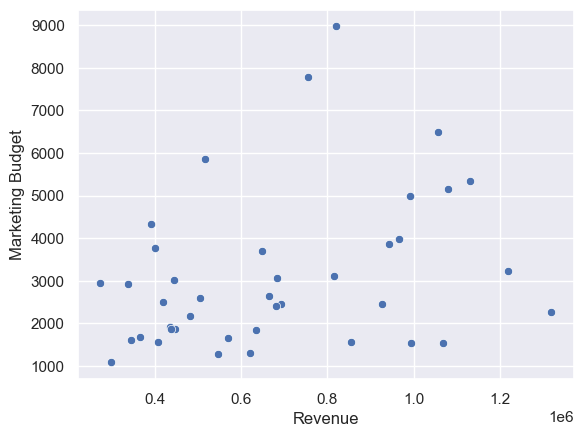

In [71]:
# We can True see that marketing budget and revenue move together.
sns.scatterplot(data=sample,x='Revenue',y='Marketing Budget')
plt.show()

### Correlation Coefficient:
Correlation adjusts covariance,so that the relationship between the two variables becomes eacy and intuitive to interpret.<br>
**Formula**:<br>
Covariance of the two vars overthe  multiplication of their standard deviations.<br>
**-1 <= Correlation Coefficient <= 1**

**Note:** Correlation is Symmetrical with respect to both variables.

In [72]:
corr_coef = revenueXmarketing_budget_cov / (revenue_std * marketing_budget.std())
corr_coef

0.3225377448766052

We manipulated the strange covariance value in order to get something intuitive.

**Correlation**:
- **+1 (Perfect Positive Correlation)**: One variable increases as the other increases, meaning one variable's entire variability is explained by the other.
- **0 (No Correlation)**: The variables are completely independent, with no relationship between them.
- **-1 (Perfect Negative Correlation)**: One variable decreases as the other increases, indicating an inverse relationship where one variable's variability is fully explained by the other.

**Casuality**:<br><br>
Important to understand the direction of causal relationships.<br>
**CORRELATION DOES NOT IMPLY CAUSATION**

# Infrential Stats:

### Distribution:
Distribution is statistics = Probability Distribution.<br>
**Def**:A distribution is a function that shows the possible values for a variable and how often they occur.<br><br>
**Sum of Probabilities**: 1 !| 100%<br>
-> We have exhausted all possibilities.<br><br>
**Note**:A Distribution is **not a graph** itself.<br>
The graph is just visual represntation.<br><br>
**Reasons**:
- They approximate a wide variety of random variables.
- Distribution of sample mens with large enough sample sizes could ne approximated to normal.
- All computable statics are elegant.
- Decisions based on normal distribution insights have a good track record.

### Sampling Distribution of the Mean:
Taking a single value,as we did in descriptive stats is **definitely suboptimal**, So we draw many,many samples and take **thier means**.<br>
to have Sampling Distribution of the mean.

In [73]:
# Sampling Distribution of the Mean for Marketing Budget(Poisson Distribution)
clt_n_samples = 30
means = []
for i in range(clt_n_samples):
    current_sample = sample.sample(n=clt_n_samples)
    means.append(current_sample['Marketing Budget'].mean())
means = pd.Series(means)


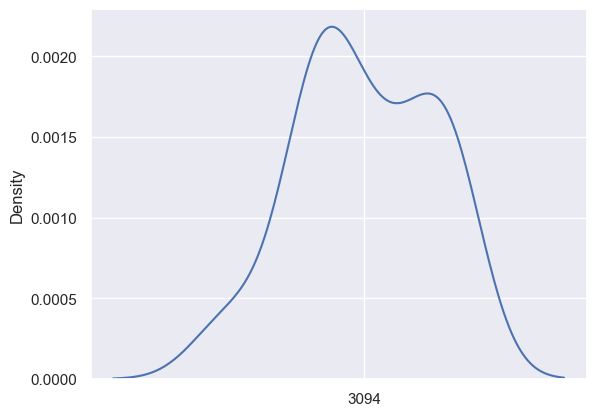

In [74]:
sns.kdeplot(means)
plt.xticks([means.mean()])
plt.show()

#### Central Limit Theorem (CLT):
States that the sampling distribution of the sample mean will approximate a normal distribution,regardless of the original population distribution,as the sample size becomes large(n >= 30).<br>
**Sampling Distribution ~ N(μ,σ²/n)**<br>
**CLT** allows us to perform tests,solve problems and make inferences using the normal distribution,even when the population is not normally distributed.

#### Standard Error:
The standard deviation of the distribution formed by the sample means.<br>
**std_err = std_dev / sqrt(n)**<br>
Like any standard deviation,it shows variability.<br>
**Importance:**<br>
Used in most statistical tests because it show how well you approximated the **true mean**.<br>
**Standard Error**: decreases when sample size increases. 

## Estimators & Estimates:
Approximation depending soley on sample information.<br>
**Estimators:** methods or formulas used to infer the value of an unknown population parameter based on sample data.<br>
**Estimates:** are the actual numerical values obtained by applying the estimator to a sample.<br>
- **Type**:
    - **Point Estimates**:one point.
    - **Confidence Intervals**:interval.

### Point Estimators & Estimates:
<ul><pre>
    Estimator            Parameter                Estimate
/how to estimate/     /what to estimate/       /concrete result/
    x-(x-bar)     of        μ            ====>     52.22  
        S²        of        σ²           ====>     1724.93

In [75]:
# Estimating Population 'Marketing Budget' Mean using Sample Mean
marketing_budget_sample_mean = sample['Marketing Budget'].mean()
print(marketing_budget_sample_mean)
 
# Or Using CLT which most of the time gives better result
clt_mean = means.mean()
clt_mean

3109.025


3094.158888888889

### Efficiency and Bias:
**Bias:**<br>
refers to the **difference** between the **expected value** of the estimator and the **true value** of the population parameter.An Estimator is said to be **unbiased** if the expected value equals the true parameter value,meaning it doesn't systematically overstimate or underestimate the parameter.<br><br>
**Efficiency:**<br>
refers to the **variance** of an estimator.An **efficient estimator** has the smallest possible variance among all unbiased estimators of a parameter.The lower the variance,the more **efficient** the estimator,as it tends to produce estimates closer to the true parameter value with less variability.

## Confidence Intervals(CIs):
provide a **range** of values that are belived to contain the true population parameter within a **certain level of confidence**.<br>
**Example**:Average Price CI = [20,25],95% CI means there is only 5% chance that the population parameter is outside the range.<br>


##### **Confidence Level**:
The probability that the confidence interval contains the true population parameter,Common levels are 95% or 99% ,indicating that if the study were repeated many times, 95% or 99% of the intervals would contain the true parameter.
##### **Alpha(α)**:
The probability that the confidence interval **not** contains the true population parameter, it represents the **significance level**.<br>
**α = 1 - confidence level**,for a 95% confidence level,α = 5%.

### **Formula**:

**Point Estimate**:for example **Population Mean** so we use **Sample Mean**.<br>
**Reliability Factor**: **z(α/2)** or **t(df,α/2)** statistic.<br>
**Margin of Error**: Reliability Factor * Standard Error.<br>
<pre>[(x-bar) - Margin of Error,(x-bar) + Margin of Error]

### Population Variance Known,Large Sample Size:
<h3>Use z-score</h3>
Large Sample Size typically n > 30.<br>

In [83]:
# 95% CI for Marketing Budget Mean using CLT Mean
# Standard Error
std_err = population['Marketing Budget'].std() / np.sqrt(n_samples)
confidence_level = 0.95 # 95%
alpha = 1 - confidence_level

# Z-critical 
z_critical = round(abs(stats.norm.ppf(alpha/2)),2)
print(z_critical)
# Margin of Error
margin_of_error = z_critical * std_err

# Confidence Interval
lower_bound = clt_mean - margin_of_error
upper_bound = clt_mean + margin_of_error

print(f"95% CI=({lower_bound:.2f},{upper_bound:.2f})") 

1.96
95% CI=(2528.62,3659.70)


We are 95% confident that the average marketing budget will be in this intervall --> **narrower but only 95% confidence**.<br>
Or 99% that it will lie in [2134,3623]-->**broader but higher confidence**.

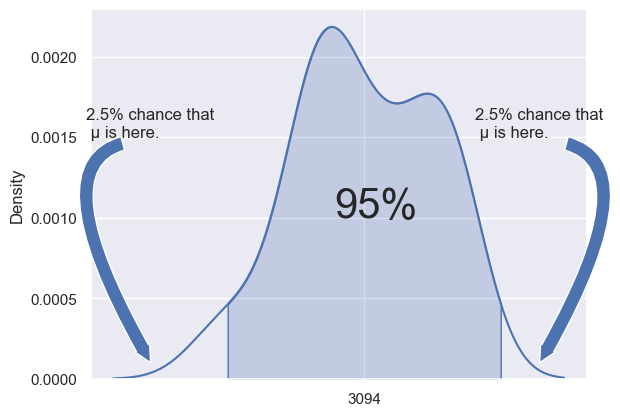

In [93]:
sns.kdeplot(means)
sns.kdeplot(means,fill=True,clip=[means.mean()-2*means.std(),means.mean()+2*means.std()])
plt.text(x=means.mean()-70,y=1e-3,s='95%',fontdict=dict(size=30))
plt.annotate(text='2.5% chance that\n μ is here.',xytext=(2450,15e-4),xy=(2600,1e-4),arrowprops=dict(width=10,connectionstyle="angle3,angleA=0,angleB=-60"))
plt.annotate(text='2.5% chance that\n μ is here.',xytext=(3350,15e-4),xy=(3500,1e-4),arrowprops=dict(width=10,connectionstyle="angle3,angleA=0,angleB=60"))
plt.xticks([means.mean()])
plt.show()

### Population Variance Unknown,Small Sample Size:
<h3>Use t-score</h3>

Small Sample Size typically n <= 30.<br>
- Ff population variance is known but the sample size it small, we use **t-static**

In [95]:
# 95% CI for Marketing Budget Mean using Mean
# Standard Error
std_err = sample['Marketing Budget'].std() / np.sqrt(n_samples)
# Degrees of Freedoom
df = n_samples-1

confidence_level = 0.95 # 95%
alpha = 1 - confidence_level

# t-critical 
t_critical = round(abs(stats.t.ppf(alpha/2,df=df)),2)

# Margin of Error
margin_of_error = t_critical * std_err

# Confidence Interval
lower_bound = sample['Marketing Budget'].mean() - margin_of_error
upper_bound = sample['Marketing Budget'].mean() + margin_of_error

print(f"95% CI=({lower_bound:.2f},{upper_bound:.2f})")

95% CI=(2529.64,3688.41)


<pre>
CI 95%, known =(2277.47,3408.56) --> width = 1131.
CI 95%,Unknown=(2384.21,3284.54) --> width = 900.
</pre>
Here we've got **two effects**:
<pre>
    1) smaller sample size.
    2) unknown population variance.
</pre>
Both contribute to the **width** of the interval.

**Smaller** margin of error => **narrower** confidence interval.<br>
**Bigger** margin or error => **wider** confidence interval.<br>
<h4>Control the ME(margin of error):</h4>

ME = (reliability factor(z or t) * std) / sqrt(n)<br>
**-z or t statistic** & **std** in the **numerator**,<br>so decreasing them decreases the ME,<br> which lead to narrower interval and viceversa.<br>
**-sample size** in the **dominator**,<br>so increasing it decreases the ME.<br>
<br>
<h4>Conclusion</h4>

The **more observations** there are in the sample,the **higher the chances** of getting a good idea about the true mean of the entire population.

### Confidence Intervals Two Means:
When comparing **the means of two populations**, various scenarios can arise depending on whether the **population variances** are **known or unknown**, and whether the **samples** are **dependent** or **independent**.
<h4>1.Independent vs Dependent Samples</h4>

<h5> Independent:</h5>

 The samples are drawn from two **different populations**,and the observations in one sample **do not affect** or **depend on** the observations in the other sample.<br>

**Examples:** comparing the average height of men and women from different groups.
<h5>Dependent:</h5> 

The samples are **related** in some way,meaning that each observation in one sample can be **paired** with an observation in the other sample.<br>

**Examples:** before-and-after study where the same individuals are measured before and after treatment.

----------------------------
<h4>2.Known vs Unknown Population Variances</h4>

<h5>Known:</h5>

This a **rare** scenario where the variances (**σ²**) of both populations are **known**. <br>
**Confidence intervals** can be caculated using the **z- distribution**.
<h5>Unknown:</h5> 

This is the **more common** scenario in practice. When the variances (**σ²**) are **unkown**, they need to be estimated from the sample data.<br>
**Confidence intervals** in this case are calculated using **t-distribution** , which adjusts for the added uncertainty in the variance estimate.

#### Dependent Samples:
Since the samples are dependent, we first calculate the differences **Di = X1i -X2i** for each pair of observations. 

In [96]:
# Load Data about Magnesium Level before and after takign a pill
before = [2,1.4,1.3,1.1,1.8,1.6,1.5,0.7,0.9,1.5]
after = [1.7,1.7,1.8,1.3,1.7,1.5,1.6,1.7,1.7,2.4]
dependent_samples = pd.DataFrame(dict(Patient=np.arange(1,11),Before=before,After=after))


# Calculate Differencies
dependent_samples['Difference'] = dependent_samples['After'] - dependent_samples['Before'] 

# Show Data
dependent_samples

,Patient,Before,After,Difference
0,1,2.0,1.7,-0.3
1,2,1.4,1.7,0.3
2,3,1.3,1.8,0.5
3,4,1.1,1.3,0.2
4,5,1.8,1.7,-0.1
5,6,1.6,1.5,-0.1
6,7,1.5,1.6,0.1
7,8,0.7,1.7,1.0
8,9,0.9,1.7,0.8
9,10,1.5,2.4,0.9


In this way, the data looks as a single populations.

In [97]:
# Calculate mean and std
diff_mean = dependent_samples['Difference'].mean()
diff_std =  dependent_samples['Difference'].std()
print(diff_mean,diff_std)

0.32999999999999996 0.45472824607426554


In [98]:
# CI 95% of Difference 
# Standard Error
std_err = diff_std / np.sqrt(dependent_samples.shape[0])

# Confidence Level
confidence_level = 0.95 
alpha = 1 - confidence_level

# Degrees of Freedoom
df = dependent_samples.shape[0] - 1

# t static
t_critical = round(abs(stats.t.ppf(alpha/2,df=df)),2)

# Margin of Error
me = t_critical * std_err

# Confidence Interval
lower_bound = diff_mean - me
upper_bound = diff_mean + me
print(f"CI =({lower_bound:.2f},{upper_bound:.2f})")

CI =(0.01,0.65)


<h5>How do we interpret this result?</h5>
<pre>
1.In 95% of the cases, the true mean will fall in this interval.
2.The whole interval is positive.
3.The levels of Mg is the test subjects blood is higher.<br>

==> **Based in our small sample,the pill IS EFECTIVE**.

#### Independent Samples:
var = s² or σ².<br>
**standard error** = sqrt(var1/n1 + var2/n2).<br>
**degrees of freedoom** = combined sample size - number of variables.<br>
<h4>Confidence Interval Formula:</h4>

**mean_diff +- critical * standard error**.

##### Known Variances:

In [99]:
# Load Data about Engineering & Management
degrees = pd.DataFrame(dict(Engineering=[100,58,10],Management=[70,65,5]),index=['Size','Sample mean','Population std'])
degrees

,Engineering,Management
Size,100,70
Sample mean,58,65
Population std,10,5


From past years, we know that the population standard deviation is 10 percentage points.<br><br>

**Problem:** We want to find a 95% Confidence interval for the difference between the grades of the students from engineering and management.
<h5>Variance of the difference</h5><pre>

**σ²diff = σ²1/n1 + σ²2/n2**</pre>
- *σ²1*: variance of first sample.<br>
- *σ²2*: variance of second sample.<br> 
- *n1*: size of first sample.<br>
- *n2*: size of second sample.<br>

In [100]:
degrees.loc['Population std','Difference'] = np.sqrt(np.dot(degrees.iloc[2]**2,1/degrees.iloc[0]))
degrees.loc['Sample mean','Difference'] = degrees.iloc[1,:2].diff().values.item(-1)*-1

In [101]:
degrees

,Engineering,Management,Difference
Size,100,70,NaN
Sample mean,58,65,-7.000000
Population std,10,5,1.164965


Population variance known and Big samples so **Z-stat** is used.<br>
**CI 95%** = (-9.28,-4.72).<br>
**Takeaways:**<pre>
1.We are 95% confident that the true mean difference between engineering and management grades falls into this interval.
2.The whole interval is negative => engineers were consistently getting lower grages.
3.Had we calculated difference as 'management - engineering'. we would get a confidence interval:**(4.75,9.28)**

##### Unknown Variances but assumed to be equal:

In [107]:
# Load Data about Apples in NY,LA
ny_apples = [3.8,3.76,3.87,3.99,4.02,4.25,4.13,3.98,3.99,3.62]
la_apples = [3.02,3.22,3.24,3.02,3.06,3.15,3.81,3.44,np.nan,np.nan]
apples = pd.DataFrame(dict(NY_apples=ny_apples,LA_apples=la_apples))
apples

,NY_apples,LA_apples
0,3.80,3.02
1,3.76,3.22
2,3.87,3.24
3,3.99,3.02
4,4.02,3.06
5,4.25,3.15
6,4.13,3.81
7,3.98,3.44
8,3.99,NaN
9,3.62,NaN


You don't know that the population variance of apple prices in NY or LA is, but you assume it should be the same.<br><br>
**Problem:** Estimate the difference of price of apples in NY and LA.
<h4>Pooled Variance</h4><pre>

**S²p = ((nx - 1)\*S²x + (ny - 1)\*s²y) / (nx + ny - 2)**</pre>
- *S²x*: variance of first sample.<br>
- *S²y*: variance of second sample.<br>
- *nx*: size of first sample.<br>
- *ny*: size of second sample.<br>

In [108]:
apples_stats = apples.agg(['mean','std'])
apples_stats.loc['size'] = apples.notnull().sum().astype(int).values
apples_stats

,NY_apples,LA_apples
mean,3.941000,3.245000
std,0.183935,0.267902
size,10.000000,8.000000


In [109]:
apples_stats.loc['std','Difference'] = np.sqrt(np.dot(apples_stats.iloc[1]**2,apples_stats.iloc[2]-1) / (apples_stats.iloc[2].sum()-2))
apples_stats.loc['mean','Difference'] = apples_stats.iloc[0,:2].diff().values.item(-1)*-1

In [110]:
apples_stats

,NY_apples,LA_apples,Difference
mean,3.941000,3.245000,0.696000
std,0.183935,0.267902,0.224568
size,10.000000,8.000000,NaN


Population variance unknown and Small samples so **t-stat** is used.<br>
**CI 95%** = (0.47,0.92).<br>
**Takeaways:**<pre>
Apples in NY are much more expensive than in LA.

##### Unknown Variances but assumed to be different:

for example to compare apples and oranges.<br>
thier variances obviously are different.<br>
The **only difference**  is the **df** is calculated using **the Welch-Satterthwaite equation**:<br>
**let** <br> 
k1 = s1*\*2 / n1<br>
k2 = s2*\*2 / n2
<pre>
v = (k1 + k2) / ((k1**2 / (n1 - 1)) + (k2**2 / (n2 - 1)))

## Hypothesis Testing:
is a fundamental concept in infrential stats that allow you to make **inferences** or **decisions** about population based on sample data.<br> <br>
**Hypothesis:** is an idea that can be tested.<br>
*Examples:*<pre>
Apples are expensive -> **statement**.
Apples more expensive than $1.75 -> **hypothesis**.<br>
no data => connot be tested => **Not a hypothesis**.
can be tested => **Might be a hypothesis**.

### Null vs Alternative:
<h4>Null Hypothesis (H0):</h4>

This is a **statement** of **no effect** or **no difference**.It is what you are trying to **test against**.<br>
*Example:* H0 might be "the mean revenue of the restaurant is $10.000".<br><br>
<h4>Alternative Hypothesis (H1 or Ha):</h4> 

This a **statement** you want to **be able to conclude**  if there is **enough evidence**.<br>
*Examples:* H1 might be "the mean revenue of the restaurant is not $10.000".

<h4>Notation</h4><pre>

**Null hypothesis** => **H0**
**Alternative hypothesis** => **H1** or **HA** </pre>
**Examples:**<pre>
H0 : μ  = $113.00
**Accept if:** x-(x bar) is close enought to the true mean.
**Reject if:** x-(x bar) is too far from the true mean.
H1 : μ != $113.00<br>
**Notes**:<pre>
-**H0** is **True** until **Rejected**.
-Outcomes of Tests refer to population parameter rather than sample static.

### Rejection Region and Significance Level:
**Significance Level** denoted as **α** ,is the probability of rejecting the null hypothesis,if it is true.<br>
<h4>Commonly Used Levels</h4><pre>

- **0.05 (5%)**: The most commonly used level.It balances the rist of making a Type 1 Error and the sensitivity of the test,**good default**.
- **0.01 (1%)**: Used when the consequenses of Type 1 Error are more sereve.For example in medical trails or critical safety testing.
- **0.10 (10%)**: Used when you want alient, allowing for a higher probability of detecting an effect (even with some risk of Type 1 Error).

In [111]:
samples = stats.norm(loc=0,scale=1).rvs(25)

**Rejection region** is the **range of values** for the test static that leads to **rejecting** the **null hypothesis** (H0).<br>
It's determined by the **significance level** (α).<br>
*Example*: in a Two-tailed test with α = 0.05 , the rejection region might be in the extreme 2.5% on both ends of the distribution.

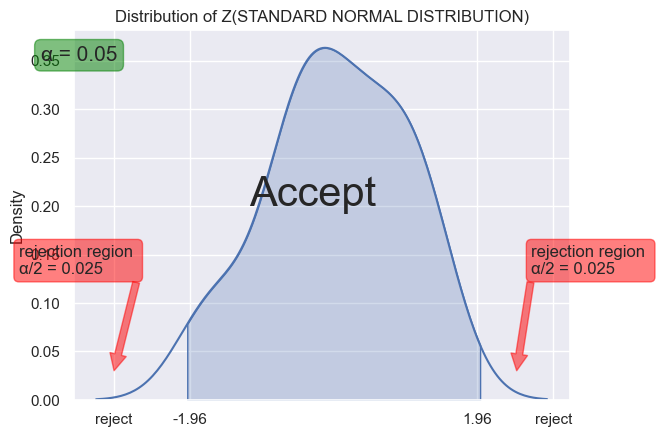

In [112]:
sns.kdeplot(samples)
sns.kdeplot(samples,fill=True,clip=(-2,2))
plt.text(x=-1.15,y=0.20,s='Accept',fontdict=dict(size=30))
plt.text(x=-4,y=0.35,s='α = 0.05',fontdict=dict(size=15),bbox=dict(color='green',alpha=0.5,boxstyle="round"))
plt.annotate(xy=(-3,0.03),xytext=(-4.3,0.13),text='rejection region \nα/2 = 0.025',arrowprops=dict(width=5,color='red',alpha=0.5),bbox=dict(color='red',alpha=0.5,boxstyle="round"))
plt.annotate(xy=(2.5,0.03),xytext=(2.7,0.13),text='rejection region \nα/2 = 0.025',arrowprops=dict(width=5,color='red',alpha=0.5),bbox=dict(color='red',alpha=0.5,boxstyle="round"))
plt.title("Distribution of Z(STANDARD NORMAL DISTRIBUTION)")
plt.xticks([-3,-1.96,1.96,3],['reject',-1.96,1.96,'reject'])
plt.show()

### One vs Two tailed Test:
<h4>One-tailed test:</h4>

Tests if a **parameter** is **either** greater than or less than a certain value (but **not both**).<br><br>
**Left-tailed:** test is used when an **alternative hypothesis (H1)** claims that the **parameter** of interest is **less than** a certain value.<br><br>
**Right-tailed:** test is used when an **alternative hypothesis (H1)** claims that the **parameter** of interest is **greater than** a certain value.

*Example*: <br>
H0 : μ0 >= $ 125,000.

H1 : μ0 < $ 125,000.

In [113]:
samples = stats.norm(loc=0,scale=1).rvs(25)

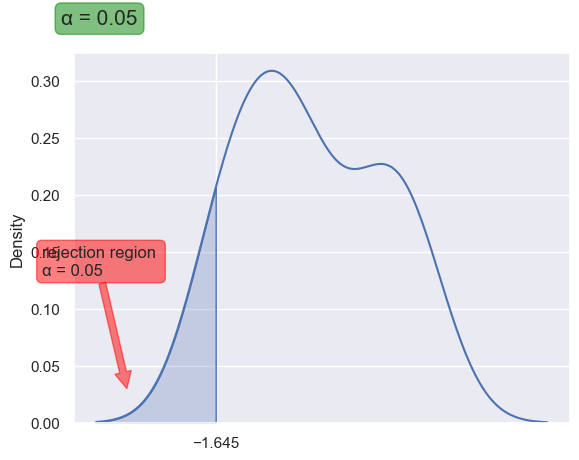

In [118]:
sns.kdeplot(samples)
sns.kdeplot(samples,fill=True,clip=(-5,-1.645))
plt.text(x=-4,y=0.35,s='α = 0.05',fontdict=dict(size=15),bbox=dict(color='green',alpha=0.5,boxstyle="round"))
plt.annotate(xy=(-3,0.03),xytext=(-4.3,0.13),text='rejection region \nα = 0.05',arrowprops=dict(width=5,color='red',alpha=0.5),bbox=dict(color='red',alpha=0.5,boxstyle="round"))
plt.xticks([-1.645])
plt.show()

if Z < -1.645, we would reject the null hypothesis.

<h4>Two-tailed test:</h4>

Tests if a **parameter** is **significantly different** from a certain value (it could be either greater or less)

*Example*: <br>
H0 : μ0 = $ 125,000.

H1 : μ0 != $ 125,000.

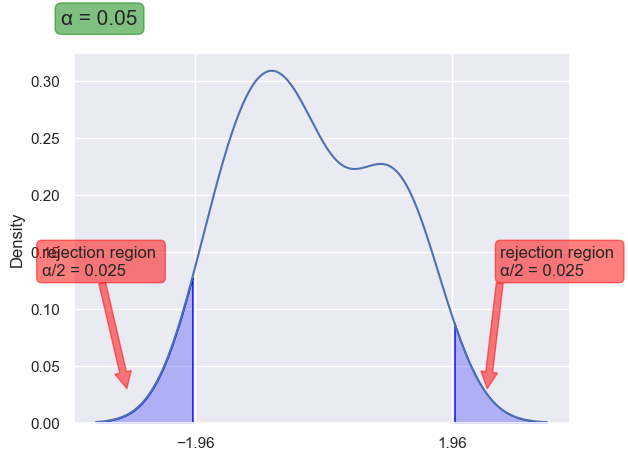

In [115]:
sns.kdeplot(samples)
sns.kdeplot(samples,fill=True,clip=(-10,-2),color='blue')
sns.kdeplot(samples,fill=True,clip=(2,10),color='blue')
plt.text(x=-4,y=0.35,s='α = 0.05',fontdict=dict(size=15),bbox=dict(color='green',alpha=0.5,boxstyle="round"))
plt.annotate(xy=(-3,0.03),xytext=(-4.3,0.13),text='rejection region \nα/2 = 0.025',arrowprops=dict(width=5,color='red',alpha=0.5),bbox=dict(color='red',alpha=0.5,boxstyle="round"))
plt.annotate(xy=(2.5,0.03),xytext=(2.7,0.13),text='rejection region \nα/2 = 0.025',arrowprops=dict(width=5,color='red',alpha=0.5),bbox=dict(color='red',alpha=0.5,boxstyle="round"))
plt.xticks([-1.96,1.96])
plt.show()

if Z < -1.96 or Z > 1.96, we would reject the null hypothesis.

### How Does Hypothesis Testing Work?<pre>
- Calculate a statistic (eg.x_bar)
- Scale it (eg.Z = (x_bar - μ)/std_err)
- Check if Z is in the rejection region.

### Errors:

#### Type 1 Error (False Positive):
**Rejecting** the **null hypothesis** (H0) when it is **actually true**.<br>
The probability of making a Type 1 Error is equal to the **significance level**(α).<br>

*Example:* if α = 0.05, there is **5%** chance of making a Type 1 Error.

#### Type 2 Error (False Negative):
**Failling** to **reject** the **null hypothesis** when it is **actually false**.<br>
The probability of making a Type 2 Error is denoted by **β**. Unlike α, β is **not set** by the researcher and depends on **factors** like **sample size** and **effect size**.



##### Summary:
**Goal of Hypothesis Testeing:** Rejecting a **false** null hypothesis (probability is **1-β**).<br>
**Type 1 Error:** Rejects H0 when it's **true** (probability is **α**).<br>
**Type 2 Error:** Fails to reject H0 when it's **false** (probability is **β**).<br>
<table>
    <tr>
        <th></th>
        <th>H0 is true</th>
        <th>H0 is false</th>
    </tr>
    <tr>
        <th>Accept</th>
        <th>Good</th>
        <th>Type 2 Error</th>
    </tr>
    <tr>
        <th>Reject</th>
        <th>Type 1 Error</th>
        <th>Good</th>
    </tr>
</table>

---
**Example:**<br>
H0: She doesn't like you.
<table>
    <tr>
        <th></th>
        <th>She doesn't like you</th>
        <th>She likes you</th>
    </tr>
    <tr>
        <th>Accept (Do nothing)</th>
        <th>Good</th>
        <th>Type 2 Error (missed your chance)</th>
    </tr> 
    <tr>
        <th>Reject (Invite her)</th>
        <th>Type 1 Error (wrongly invited her)</th>
        <th>Good</th>
    </tr>
</table>

### **Decision Rule:**<pre>
- S = Test Stat (Z,T,...).
- Critical = Critival value of **α** in one-tailed test or **α/2** in two-tailed test.
</pre>

#### **Left-tailed Test:**<pre>
- **REJECT H0** if **S** < **Critical**. 
- **FAIL to REJECT H0** if **S** >= **Critical**.

#### **Right-tailed Test:**<pre>
- **REJECT H0** if **S** > **Critical**. 
- **FAIL to REJECT H0** if **S** <= **Critical**.

#### **Two-tailed Test:**<pre>
- **REJECT H0** if **S** > **upper critical value** or **S** < **lower critical value**. 
- **FAIL to REJECT H0** otherwise.

### P value:
##### is the measure used to determine the **strength of the evidence** against the null hypothesis.
is the **smallest level** of significance at which we **can still reject** the **null hypothesis**, given the observed sample statistic.<br>

<h4>Formula</h4>

**Left-tailed**: <pre>p_value = CDF(Z).</pre><br>
**Right-tailed**:<pre>p_value = 1 - CDF(Z).</pre>
**Two-tailed**: <pre>p_value = 2 * (1 - CDF(abs(Z))).</pre>
<h4>Intrepretation</h4><pre>

- **Small p-value** (typically <= 0.05) indicates strong evidence against the null hypothesis, leading to its rejection.
- **Large p-value** (typically > 0.05) suggests insufficient evidence to reject the null hypothesis.
</pre>
<h4>P-values Use Cases?</h4><pre>

- **Testing Hypothesis**:to determine if there is enough evidence to reject the null hypothesis.
- **Corrleation & Regression**:Evaluating the significance of predictors in models.</pre>

#### **Decision Rule:**<pre>
- **REJECT H0** if **p** < **α**. 
- **FAIL to REJECT H0** if **p** > **α**.
#### **Note:**
It is **affected** by **sample size**, larger samples can produce smaller p-values even for trivial effects.

### One Sample

In [126]:
# Load Data
salaries = pd.Series([148100, 98700, 140032, 100022, 120000, 62100, 250000, 150000, 219650, 136000, 87800, 76300, 148100, 98700, 145500, 93000, 85000, 75000, 105000, 70000, 204662, 184662, 179000, 112000, 115000, 85000, 225000, 180000, 175000])
salaries.shape

(29,)

<pre>
H0 : μ0 >= $ 170,000.
H1 : μ0 < $ 170,000.

significance level = 5%

#### Test for the Mean Population,Variance Known:
We use Z-distribution.

In [127]:
# Calculate & Set Needed Stats
alpha = 0.05
hypothesised_mean = 170_000
salary_sample_mean = salaries.mean()
salary_population_std = 45_000
std_err = salary_population_std / np.sqrt(salaries.size)

In [128]:
# Standardize Estimator(X-bar)
Z = (salary_sample_mean - hypothesised_mean) / std_err
Z

-4.376929905220666

In [131]:
alpha_z_critical = round(stats.norm.ppf(alpha),2)
print(alpha_z_critical)
print(f"Z < z-stat: {Z < alpha_z_critical}")

-1.64
Z < z-stat: True


So at **5% signficance level** there is no statistical evidence that the mean salary is greater than $170,000.<br>
The Null Hypothesis is **REJECTED**.

#### Test for the Mean Population,Variance unknown:
**Same Steps** but we use **t-distribution** instead of z.

### Paired Samples (Dependent)

**Task**:<br>
We expect the levels of Mg to be increasing.<br>
Therefore, this is the alternative hypothesis as we are aiming to reject the null.<br><pre>
**Hypothesis:**
H0 : μ_a <= μ_b
H1 : μ_a > μ_b

**So μ_diff = μ_a - μ_b:**
H0 : μ_diff <= 0
H1 : μ_diff > 0

In [132]:
before = [2,1.4,1.3,1.1,1.8,1.6,1.5,0.7,0.9,1.5]
after  = [1.7,1.7,1.8,1.3,1.7,1.5,1.6,1.7,1.7,2.4]
magnesium_levels = pd.DataFrame(dict(Before=before,After=after))
# Calculate Difference (A - B)
magnesium_levels['Difference'] = magnesium_levels['After'] - magnesium_levels['Before']
magnesium_levels

,Before,After,Difference
0,2.0,1.7,-0.3
1,1.4,1.7,0.3
2,1.3,1.8,0.5
3,1.1,1.3,0.2
4,1.8,1.7,-0.1
5,1.6,1.5,-0.1
6,1.5,1.6,0.1
7,0.7,1.7,1.0
8,0.9,1.7,0.8
9,1.5,2.4,0.9


In [133]:
# Set & Calculate Stats
alpha = 0.05
hypothesised_mean = 0
n_samples = magnesium_levels.shape[0]
df = n_samples - 1
diff_mean = magnesium_levels['Difference'].mean()
diff_std = magnesium_levels['Difference'].std()
std_err = diff_std / np.sqrt(n_samples)

In [134]:
T = (diff_mean - hypothesised_mean) / std_err
T

2.2948907108029832

In [135]:
p_value = stats.t.cdf(T,df=df)
p_value

0.9763030318013011

**P value** is **greater** than **significance level** (0.97 > 0.05) <br>
So we **FAILED to REJECT** the null hypothesis.

### Two Samples (Independent)

#### Known Variances:

**Task**: there are rumors that says :"on Average,management outperforms engineerings by 4%".Is it true?<br><pre>
**Hypothesis:**
H0 : μ_m - μ_e = 4%
H1 : μ_m - μ_e != 4%

In [138]:
# Load Data
grades = pd.DataFrame(dict(Engineering=[100,58,10],Management=[70,65,6],Difference=[np.NaN,7,np.NaN]),index=['Size','Mean','Population std'])
grades

,Engineering,Management,Difference
Size,100,70,NaN
Mean,58,65,7.0
Population std,10,6,NaN


In [139]:
hypothesized_diff = 4
significance_level = 0.1
std_err = np.sqrt(grades.iloc[-1,0]**2 / grades.iloc[0,0] + grades.iloc[-1,1]**2 / grades.iloc[0,1])
std_err

1.230563169563316

In [213]:
Z = (grades.loc['Mean','Difference'] - hypothesized_diff) / std_err
Z

2.4379081661160034

In [140]:
p_value = 2 * (1 - stats.norm.cdf(abs(Z)))
p_value

1.2036266070269974e-05

**P value** is **less** than **Significance Level** so null hype is **REJECTED**.<br>
There is enough statistical evidence that the mean difference is **NOT 4%**.

**IS THE DIFFERENCE HIGHER OR LOWER THAN 4%:**<br>
The **sign** of the test statistic shows if the mean is lower or higher than the hypothesised value.<br>
The sign of Z is positive which means the Management grades are much higher than Engineering with more than 4%. 

#### **Same Ideas as CIs for the rest**:
Cause both **CIs** and **HT** are based on **CLT**.

#### Unknown Variances but assumed to be Equal:

#### Unknown Variances but assumed to be Different: